In [2]:
import numpy as np 
import pandas as pd 
import pickle
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Loading digits of data
digits = datasets.load_digits()

In [4]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

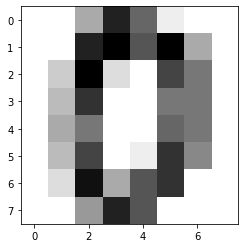

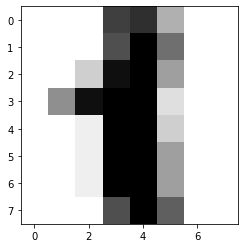

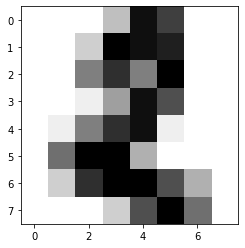

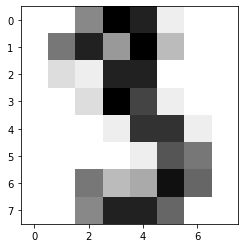

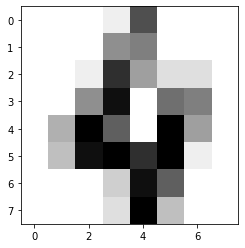

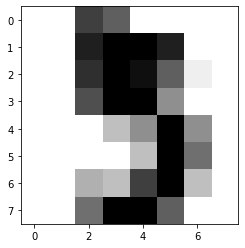

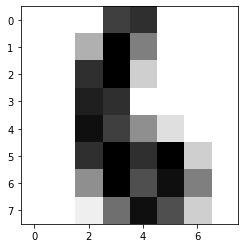

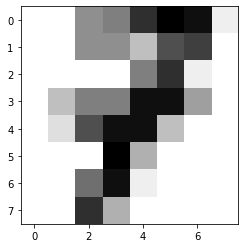

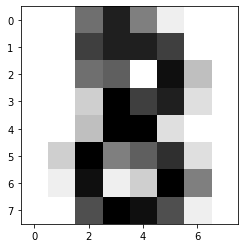

In [5]:
# Display digits
for i in range(9):
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [6]:
# Features and target arrays created
X = digits.data
y = digits.target

In [7]:
# kNN classifier with 7 neighbours
knn = KNeighborsClassifier(n_neighbours=7)

In [8]:
# Training and test set split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42, stratify=y)

In [9]:
# Training data fit into classifier
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
# Accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


In [11]:
# Arrays to store accuracy of test and train
neighbours = np.arange(1, 9)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

In [12]:
# Loop over different values of k
for i, k in enumerate(neighbours):
    # Setup a kNN Classifier with k neighbours
    knn = KNeighborsClassifier(n_neighbours=k)

    # Training data fit into classifier
    knn.fit(X_train, y_train)
    
    #Accuracy for training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Accuracy for testing set
    test_accuracy[i] = knn.score(X_test, y_test)

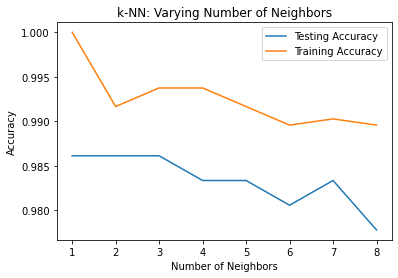

In [13]:
# Plot generated
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbours, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbours, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [14]:
from joblib import dump, load
dump(knn, 'scikit_trained.joblib') 

['scikit_trained.joblib']